In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("ushape.csv",header=None)
# df=pd.read_csv("ushape.csv",header=None,names=['X','Y','class'])

In [3]:
df=df.round(4)  # round of four place 
df.columns = ['X', 'Y', 'class']


In [4]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1151,-0.0462,1.0
2,0.8825,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8295,-0.5393,1.0


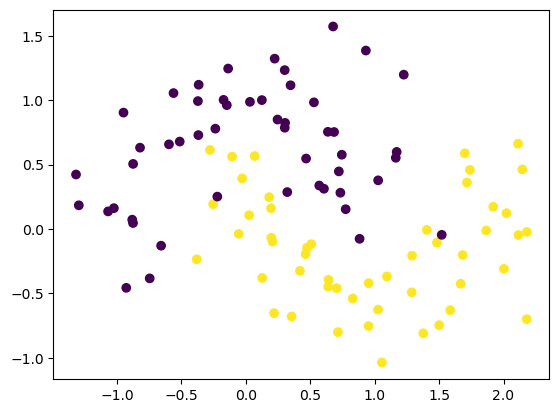

In [5]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [6]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

c:\Users\rosha\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [8]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\rosha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.get_weights()

[array([[ 0.31414628,  0.37033916, -2.175738  , -0.27482912, -1.5921085 ,
         -1.2716432 ,  0.61145943, -0.4646545 ,  0.27892235,  0.7381705 ],
        [-1.7075777 , -0.5136722 , -0.3195903 , -1.6271061 , -0.1957813 ,
         -0.25293246, -1.5185895 , -0.43186766, -0.32964522,  1.4290475 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-2.4816380e-01,  2.0766166e-01, -1.1909269e-01,  4.0079750e-02,
         -5.2997959e-01,  3.8983026e-01, -1.7936799e-01,  1.1719098e-02,
         -6.7565507e-01, -2.9324610e-02],
        [ 3.2025236e-01,  2.2752839e-01,  1.6784215e-01,  1.6879044e-01,
         -4.3464005e-01, -2.8642857e-01, -1.0585699e-01,  7.9952277e-02,
         -4.1449052e-01, -4.7985110e-02],
        [ 3.0939299e-01, -9.3312778e-02, -2.0661458e-01, -5.1504874e-01,
          3.0406660e-01,  2.5301701e-01,  2.9080996e-01, -3.3849034e-01,
          6.0772091e-01,  1.9418879e-01],
        [-4.7174209e-01, -8.1638079e-03, -9.16544

In [10]:
initial_weights = model.get_weights()

In [11]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [12]:
model.set_weights(initial_weights)

In [13]:
model.get_weights()

[array([[-0.34507635, -0.2864437 ,  1.0416099 ,  0.33000445, -0.18059993,
         -0.7689872 ,  0.47727904, -0.14698027, -0.9940845 , -0.9377997 ],
        [-0.7619487 ,  0.44587138, -0.066806  , -0.5748176 , -0.68851745,
         -1.6819712 , -0.37986508,  0.47513926,  0.58970773, -0.5428248 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.01046393,  0.3989397 , -0.16904041, -0.00350238,  0.00142239,
         -0.3412033 ,  0.3331943 , -0.10759822, -0.18382505,  0.24929081],
        [-0.29766262,  0.04006612,  0.41929096, -0.23211162, -0.7883113 ,
         -0.33310977,  0.44253027,  0.33988854, -0.3955068 , -0.07048105],
        [ 0.20821469, -0.07174991, -0.08088588,  0.28749144, -0.05291414,
         -0.7695935 ,  0.30285016, -0.04220739, -0.00844042, -0.12181669],
        [-0.30384284,  0.1796643 , -0.54977226,  0.08453219, -0.00676736,
          0.75241345,  0.08782192, -0.1137405 , -0.25858873,  0.08416215],
        [ 0.54778

In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.5000 - loss: 0.6973 - val_accuracy: 0.5000 - val_loss: 0.7038
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5000 - loss: 0.6958 - val_accuracy: 0.5000 - val_loss: 0.7016
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5000 - loss: 0.6946 - val_accuracy: 0.5000 - val_loss: 0.6996
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5000 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6972
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5000 - loss: 0.6920 - val_accuracy: 0.5000 - val_loss: 0.6950
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5125 - loss: 0.6907 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5125 - loss: 0.6894 - val_accuracy: 0.4500 - val_loss: 0.6905
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4875 - loss: 0.6880 - val_accuracy: 0.5000 - val_loss

In [16]:
model.get_weights()

[array([[-0.17920545, -0.09184342,  1.2337898 ,  0.37309462, -0.01534615,
         -1.0566493 ,  0.6011202 ,  0.00649979, -1.1470438 , -1.1694425 ],
        [-0.9934124 ,  0.69222754, -0.2803966 , -0.49135426, -0.9499697 ,
         -1.4914781 , -0.680087  ,  0.7269503 ,  0.697381  , -0.3953245 ]],
       dtype=float32),
 array([ 0.2957773 ,  0.11486027,  0.22897193, -0.07558727,  0.27313742,
        -0.11345144,  0.17375894,  0.14730205,  0.05579072, -0.08302822],
       dtype=float32),
 array([[ 0.31238124,  0.41048846, -0.26218143,  0.06436344, -0.02383842,
         -0.3341556 ,  0.61107427, -0.14131612, -0.18382505,  0.10271212],
        [-0.5711934 ,  0.18972449,  0.67874795, -0.02776236, -0.6186948 ,
         -0.21836662,  0.3987684 ,  0.51736784, -0.3955068 ,  0.05907036],
        [ 0.37643403,  0.14747915,  0.07624722,  0.45627943, -0.08809064,
         -0.86054975,  0.48710346,  0.06366663, -0.00844042, -0.04921035],
        [-0.05880979,  0.26140273, -0.84577847,  0.11708929, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 889us/step


<Axes: >

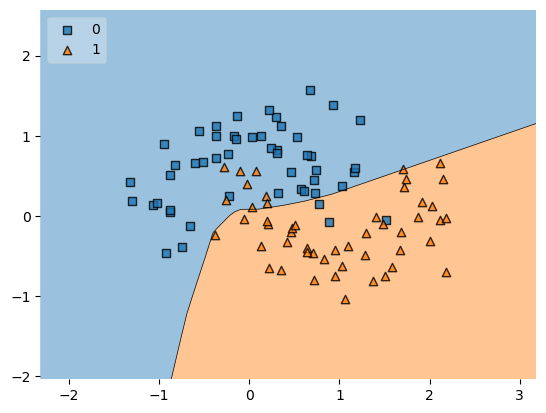

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)